<a href="https://colab.research.google.com/github/Jiajuan0/predoc_apply/blob/main/logwithsklearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Implementation with sklearn**
In the report we write the model from scratch. Here we provide another way when sklearn is applied.

# Clean and process the data

> 添加区块引用符号




In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.metrics import accuracy_score

# Load the dataset
file_path = 'spam.data'  # Update this path as needed
data = pd.read_csv(file_path, sep=' ', header=None)

# Separate features and target variable
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=3065, test_size=1536, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)




# Fit different Model

In [ ]:
# Fit a standard logistic regression model without regularization
log_reg = LogisticRegression(penalty='none', max_iter=10000, random_state=42)
log_reg.fit(X_train_scaled, y_train)
y_train_pred = log_reg.predict(X_train_scaled)
y_test_pred = log_reg.predict(X_test_scaled)
accuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)
print(f"Standard Logistic Regression without regularization - Training accuracy: {accuracy_train}, Test accuracy: {accuracy_test}")

In [ ]:
# Fit a logistic regression model with L2 regularization using cross-validation
log_reg_cv = LogisticRegressionCV(cv=5, penalty='l2', max_iter=10000, random_state=42, solver='liblinear')
log_reg_cv.fit(X_train_scaled, y_train)
y_train_pred_cv = log_reg_cv.predict(X_train_scaled)
y_test_pred_cv = log_reg_cv.predict(X_test_scaled)
accuracy_train_cv = accuracy_score(y_train, y_train_pred_cv)
accuracy_test_cv = accuracy_score(y_test, y_test_pred_cv)
optimal_c = log_reg_cv.C_[0]
print(f"Logistic Regression with L2 regularization - Training accuracy: {accuracy_train_cv}, Test accuracy: {accuracy_test_cv}, Optimal C: {optimal_c}")

# Feature Importance

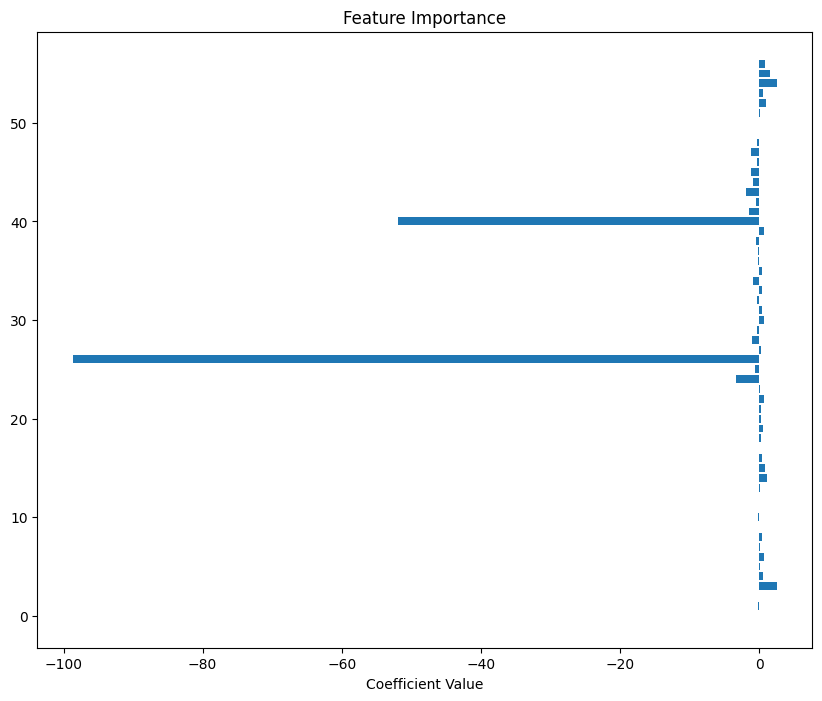

In [11]:
# Get coefficients from the model
coefficients = log_reg.coef_.flatten()  # For the non-regularized model
importance_df = pd.DataFrame(data={'Feature': X.columns, 'Coefficient': coefficients})

# Sort by absolute value to see the most important features
importance_df['Absolute Coefficient'] = importance_df['Coefficient'].abs()
importance_df_sorted = importance_df.sort_values(by='Absolute Coefficient', ascending=False)

# Plotting the feature importance
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
plt.barh(importance_df_sorted['Feature'], importance_df_sorted['Coefficient'])
plt.xlabel('Coefficient Value')
plt.title('Feature Importance')
plt.show()